# Titanic Machine Learning Challenge

Hello! 

Thanks for taking some time to read and contribute to the work on this notebook.

The methodology of this notebook will cover the following steps:
 * <a href="#1">1.	Titanic Disaster Concept</a>
 
 * <a href="#2">2.	Python’s methods and functions basic explanation</a>
 
 * <a href="#3">3.	Dataset and variables understanding</a>
     * <a href="#3.1"> Importing and Opening dataset in Python</a>
     * <a href="#3.2"> Analysing each variable</a>
         * <a href="#3.2.1"> PassengerId</a>
         * <a href="#3.2.2"> Survived</a>
         * <a href="#3.2.3"> Pclass</a>
         * <a href="#3.2.4"> Name</a>
         * <a href="#3.2.5"> Sex</a>
         * <a href="#3.2.6"> Age</a>
         * <a href="#3.2.7"> SibSp + Parch</a>
         * <a href="#3.2.8"> Fare</a>
         * <a href="#3.2.9"> Ticket + Cabin</a>
         * <a href="#3.2.10"> Embarked</a>
 * <a href="#4">4.  Implementation</a>
 
 * <a href="#5">5.	Possible Machine Leaning Models</a>
 
 * <a href="#6">6.	Conclusion</a>



<a id='1'></a>
## 1. Titanic Disaster Concept

Fact: Titanic sank in 1912 and out of 2224 passengers and crew, only 722 people survived (2224 passengers minus 1502 dead). ~32% of survivors =(

Challenge: Kaggle provided two datasets (train.csv and test.csv) considering important information about these passengers. Within this information we can find different characteristics for each passenger such (sex, age, Port of embark and cabin number). However, some of that information on the dataset is missing or is in a format that cannot be processed by any sort of algorithm. So one of the first tasks before creating any Machine Learning model to predict our outcomes, we have to clean and model the dataset.

Goal: Create a Machine Learning model (ML) to predict how many passengers from the test.csv dataset survived.

<a id='1'></a>
# 2. Python’s methods and functions basic explanation

This notebook was based on many others notebooks which are credited for on the last section of this notebook. Note that  HERE, throughout the code, the basic functions, methods and libraries of Python will be explained as well. This will be helpful for you to get familiar with Python!

<a id='3'></a>
# 3. Dataset and variables understanding

Let's get started importing our dataset to python to understand how the information is structured.

Below the list of tasks that we will perform on the dataset:

-Importing and Opening dataset in Python

-Understanding variables

-Dealing with Missing Values

-Dealing with Outliers

-Modeling Data

<a id='3.1'></a>
### 3.1 Importing and Opening dataset in Python

Python uses a library called Pandas to work with data structures, so firstly we will import this library to be able to magage our data in Python. Then we will import the datasets to Python.

In [1]:
#Pandas is the library that works with dataframes
import pandas as pd

#NumPy is the fundamental package for scientific computing with Python
import numpy as np

#This module provides regular expression matching operations similar to those found in Perl.
import re as re

# visualization
import matplotlib.pyplot as plt 
plt.style.use(['ggplot']) 
%matplotlib inline 
import seaborn as sns 
import warnings 
warnings.filterwarnings('ignore')

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
# importing both dataframes to python (train.csv and test.csv)
train=pd.read_csv(r'C:\Users\Marcello\Desktop\Projects\20190618_Titanic_ML\Dataset\train.csv')
test=pd.read_csv(r'C:\Users\Marcello\Desktop\Projects\20190618_Titanic_ML\Dataset\test.csv')

# merging both datasets to manipulate variables when modeling and cleaning them
df = [train , test]

#displaying the first 5 rows of the train.csv dataset for our first reference
df[0].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Looking to the first five rows of the training dataset we can make the first analysis on the Variables' type. The classification of these below is important to helps us select the appropriate tools for visualization.

**Categorical Variables**

- Categorical: Survived, Sex, and Embarked. Ordinal: Pclass.

**Numerical Variables**

- Continous: Age, Fare. Discrete: SibSp, Parch.

**Mixed Variables**

- Ticket and Cabin are a mix of numeric and alphanumeric data types. 
- It is possible to extract titles, round brackets, and quotes used for names. That would be helpfull to check missing values for Age and Sex of Passengers. 

The function .info() shows the type and number of data for each variable. We are going to perform that function in both datasets (train and test) to search for empty,blank and null values.

The method .shape shows the size of the dataset (rows x columns)

In [3]:
df[0].info()
print(train.shape)
print('-'*50)
df[1].info()
print(test.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
(891, 12)
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket 

In [4]:
Null = train.isnull().sum().sort_values(ascending=False)
percent = (round(train.isnull().sum()/train.isnull().count()*100, 1)).sort_values(ascending=False)
missing_data_train = pd.concat([Null, percent], axis=1, keys=['Null', '%'])

Null = test.isnull().sum().sort_values(ascending=False)
percent = (round(test.isnull().sum()/test.isnull().count()*100, 1)).sort_values(ascending=False)
missing_data_test = pd.concat([Null, percent], axis=1, keys=['Null', '%'])

print(missing_data_train.head(5))
print('-'*25)
print(missing_data_test.head(5))

          Null     %
Cabin      687  77.1
Age        177  19.9
Embarked     2   0.2
Fare         0   0.0
Ticket       0   0.0
-------------------------
          Null     %
Cabin      327  78.2
Age         86  20.6
Fare         1   0.2
Embarked     0   0.0
Ticket       0   0.0


**Empty, Blank and Null values**
From the output above we know that:

- Cabin , Age , Embarked variables contain null values:
Total training dataset: 891 rows
       Cabin 204 non-null object = 687 Null objects
        Age  714 non-null object = 177 Null objects
        Embarked 889 non-null object = 2 Null objects
        
- Cabin and Age are incomplete in case of test dataset.
Total test dataset: 418 rows
        Cabin 91 non-null object = 327 Null objects
        Age  332 non-null object = 86 Null objects

**Data types for variables**

- Seven variables are integers or floats. (Six for test dataset)
- Five variables are strings (object).

In [5]:
###COMPLETING: complete or delete missing values in train and test/validation dataset
# Remove all NULLS in the Embarked column
for dataset in df:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')
    
# Remove all NULLS in the Fare column 
for dataset in df:
    dataset['Fare'] = dataset['Fare'].fillna(train['Fare'].median())

# Remove all NULLS in the Age column 
for dataset in df:
    age_avg = dataset['Age'].mean()
    age_std = dataset['Age'].std()
    age_null_count = dataset['Age'].isnull().sum()
    age_null_random_list = np.random.randint(age_avg - age_std, age_avg + age_std, size=age_null_count)
    dataset['Age'][np.isnan(dataset['Age'])] = age_null_random_list
    dataset['Age'] = dataset['Age'].astype(int)
    
print(df[0].isnull().sum())
print("-"*10)
print(df[1].isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64
----------
PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64


The .describe() method brings information such as count, mean,standard deviation and quartiles. We will use this information to base our further assumptions on the dataset. Note that this function will not show all dataset

In [6]:
df[0].describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.679012,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.601066,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,21.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Analysing distribution of numerical variables of sample**

- Total samples are 891 or 40% of the actual number of passengers on board the Titanic (2,224).
- Survived is a categorical variable with 0 or 1 values.
- Around 38%(mean of survived) samples survived representative of the actual survival rate at 32%.
- Most passengers (75% of SibSP) did not travel with parents or children.


In [7]:
#for the rest of data we are going to use the function below
df[0].describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,891
unique,891,2,681,147,3
top,"Hocking, Mrs. Elizabeth (Eliza Needs)",male,1601,B96 B98,S
freq,1,577,7,4,646


**Analysing the distribution of categorical variables of sample**

- Names are unique across the dataset (count=unique=891)
- Sex variable as two possible values with 65% male (top=male, freq=577/count=891).
- Cabin values have several dupicates across samples. We can assume that several passengers shared a cabin.
- Embarked takes three possible values. S port used by 72% of the passengers (top=S, freq=644/count=889)
- Ticket feature has high ratio (22%) of duplicate values (unique=681). We can assume that the Tickets were bougth as family package 

<a id='3.2'></a>
### 3.2 Analysing each variable

These early insights were important to take decisions and manipulate our variables. The next step of this project will perform the following action in out dataset:

- Dealing with Missing Values
- Dealing with Outliers
- Modeling Data
- Checking correlation

Some of these variables will not be relevant for our ML model. Thus, they will be dropped from our dataset. We could shrink the code performing some of the functions just once to achieve quicker results. However, as this notebook is an illustration of Python and ML techiniques we will check variable by variable. 

<a id='3.2.1'></a>
## 3.2.1 Passenger Id 
- <b>Definition</b>: This feature is the unique value per row that represents the sequence of the passengers on the database.
- <b>Analysis</b>: This feature will not be relevant for our ML model as it only represents the sequence of the passengers on the database.
- <b>Assumption</b>: We are going to drop it from both databases: (train and test)

In [8]:
for dataset in df:
    dataset.drop(['PassengerId'],axis =1, inplace=True)

df[0].shape , df[1].shape

((891, 11), (418, 10))

<a id='3.2.2'></a>
## 3.2.2 Survived

- <b>Definition</b>:Survived is a binary categorical data [0,1] that will define the model's response.
- <b>Analysis</b>:
    - train dataset: Survived represents if the passenger survived or not. Previously we checked that there aren't null objects on this dataset and it's type is ready to be inputed in our ML model (int64)
    - test dataset: There is no Survived feature on this dataset as it will be created from our ML model.


<a id='3.2.3'></a>
## 3.2.3 Pclass

- <b>Definition</b> This Categorical Variable type is also an interger and there aren't missing values.
    pclass: A proxy for socio-economic status (SES)
    1st = Upper
    2nd = Middle
    3rd = Lower
- <b>Analysis</b>: Most of the passangers of classes 1 and 2 survived. 
- <b>Correlation</b>:The correlation between Pclass and Survived is weak. 
- <b>Assumption</b>:

In [9]:
df[0][['Pclass','Survived']].corr()

,Pclass,Survived
Pclass,1.000000,-0.338481
Survived,-0.338481,1.000000


Text(0.5,1,'Plass')

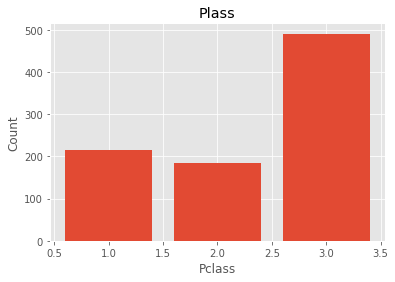

In [10]:
Pclassnumber = df[0]['Pclass'].value_counts().sort_index()
plt.bar([1,2,3],Pclassnumber)
plt.xlabel("Pclass")
plt.ylabel("Count")
plt.title("Plass")

<a id='3.2.4'></a>
## 3.2.4 Name

- <b>Definition</b>: This feature represents the names of the passengers and crew.
- <b>Analysis</b>: The Variable **Name** type is a string and there aren't any null values as well. The name of the Passenger is not relevant to define if he/she survived or not. However, it would be great to know the title of the passenger  as some of the tripulants (higher hierarchy as most likely to survive as per the female passengers as well).
- <b>Assumption</b>: The code below will extract the title from each of the passenger names string, it will check if we wont have any missing values and finally it will classify(map) each title to have a numeric type to input in our ML model

In [11]:
for dataset in df:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(df[0]['Title'], df[0]['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [12]:
for dataset in df:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
df[0][['Title', 'Survived']].groupby(['Title'], as_index=False).mean().sort_index()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


Text(0.5,1,'Title')

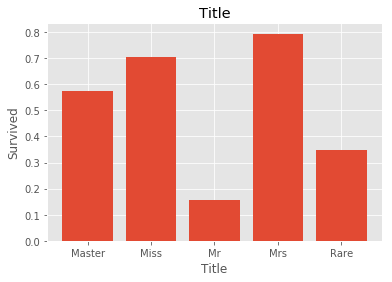

In [13]:
Titlebar = df[0][['Title', 'Survived']].groupby(['Title'], as_index=False).mean().sort_index()
plt.bar(Titlebar['Title'],Titlebar['Survived'])
plt.xlabel("Title")
plt.ylabel("Survived")
plt.title("Title")

In [14]:
# for index,dataset in enumerate(df):
#     dv_title = pd.get_dummies(dataset["Title"])
#     df[index] = pd.concat([dataset, dv_title], axis=1)
#     df[index].drop(['Name','Title'], axis = 1, inplace=True)

In [15]:
title_mapping = {"Mr": 0, "Miss": 1, "Mrs": 2, "Master": 3, "Rare": 4}
for dataset in df:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)
    dataset.drop('Name', axis = 1, inplace=True)

<a id='3.2.5'></a>
## 3.2.5 Sex

- <b>Definition</b>: The Categorical Variable **Sex** type is a string and there aren't any null values as well. 
- <b>Analysis</b>: ___
- <b>Assumption</b>: We are going to model female as '0' and male as '1' to input in our ML model.

In [16]:
# for index,dataset in enumerate(df):
#     dv_sex = pd.get_dummies(dataset["Sex"])
#     df[index] = pd.concat([dataset, dv_sex], axis=1)
#     df[index].drop('Sex', axis = 1, inplace=True)

In [17]:
def get_person(passenger):
    age,sex = passenger
    return 'child' if age < 18 else sex
    
for index,dataset in enumerate(df):
    dataset['Person'] = dataset[['Age','Sex']].apply(get_person,axis=1)
    dv_sex = pd.get_dummies(dataset["Person"])
    df[index] = pd.concat([dataset, dv_sex], axis=1)
    df[index].drop(['Sex','Person','male'], axis = 1, inplace=True)

<a id='3.2.6'></a>
## 3.2.6 Age

- <b>Definition</b>: __ 
- <b>Analysis</b>: ___
- <b>Assumption</b>: __

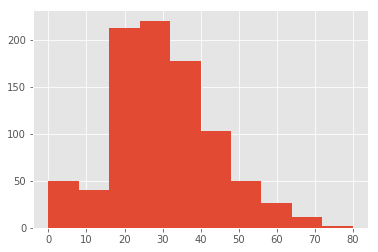

In [18]:
train['Age'].hist(bins=10)

In [19]:
df[0]['Agerange'] = pd.qcut(df[0]['Age'], 5)
df[0][['Agerange', 'Survived']].groupby(['Agerange'], as_index=False).mean().sort_index()

,Agerange,Survived
0,"(-0.001, 19.0]",0.430769
1,"(19.0, 25.0]",0.302857
2,"(25.0, 32.0]",0.409091
3,"(32.0, 40.0]",0.397727
4,"(40.0, 80.0]",0.372781


In [20]:
for dataset in df:    
    dataset.loc[ dataset['Age'] <= 19, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 19) & (dataset['Age'] <= 25), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 25) & (dataset['Age'] <= 32), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 40), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 40, 'Age'] = 4
df[0].drop(['Agerange'],axis =1, inplace=True)

<a id='3.2.7'></a>
## 3.2.7 SibSp + Parch

- <b>Definition</b>: __ 
- <b>Analysis</b>: ___
- <b>Assumption</b>: __

In [21]:
for dataset in df:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

df[0][['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_index()

,FamilySize,Survived
0,1,0.303538
1,2,0.552795
2,3,0.578431
3,4,0.724138
4,5,0.200000
5,6,0.136364
6,7,0.333333
7,8,0.000000
8,11,0.000000


In [22]:
for dataset in df:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

df[0][['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


In [23]:
for dataset in df:
    dataset.drop(['SibSp','Parch','FamilySize'],axis =1, inplace=True)

<a id='3.2.8'></a>
## 3.2.8 Fare

- <b>Definition</b>: __ 
- <b>Analysis</b>: ___
- <b>Assumption</b>: __

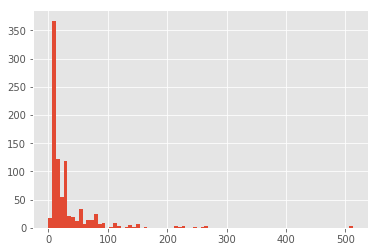

In [24]:
df[0]['Fare'].hist(bins=80)

In [25]:
df[0]['Farerange'] = pd.qcut(df[0]['Fare'], 5)
df[0][['Farerange', 'Survived']].groupby(['Farerange'], as_index=False).mean().sort_index()

,Farerange,Survived
0,"(-0.001, 7.854]",0.217877
1,"(7.854, 10.5]",0.201087
2,"(10.5, 21.679]",0.424419
3,"(21.679, 39.688]",0.444444
4,"(39.688, 512.329]",0.642045


In [26]:
for dataset in df:    
    dataset.loc[ dataset['Fare'] <= 1 , 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 1) & (dataset['Fare'] <= 4), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 4) & (dataset['Fare'] <= 7.75), 'Fare'] = 2
    dataset.loc[(dataset['Fare'] > 7.75) & (dataset['Fare'] <= 8.662), 'Fare'] = 3
    dataset.loc[ dataset['Fare'] > 8.662, 'Fare'] = 4
    dataset['Fare'] = dataset['Fare'].astype(int)
df[0].drop(['Farerange'],axis =1, inplace=True)

<a id='3.2.9'></a>
## 3.2.9 Ticket + Cabin

- <b>Definition</b>: __ 
- <b>Analysis</b>: ___
- <b>Assumption</b>: __

In [27]:
for dataset in df:
    dataset.drop(['Ticket','Cabin'],axis =1, inplace=True)

<a id='3.2.10'></a>
## 3.2.10 Embarked

- <b>Definition</b>: __ 
- <b>Analysis</b>: ___
- <b>Assumption</b>: __

In [28]:
for dataset in df:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

In [29]:
print(df[0].shape,df[1].shape)
df[0].head()

(891, 9) (418, 8)


,Survived,Pclass,Age,Fare,Embarked,Title,child,female,IsAlone
0,0,3,1,2,0,0,0,0,0
1,1,1,3,4,1,2,0,1,0
2,1,3,2,3,0,1,0,1,1
3,1,1,3,4,0,2,0,1,0
4,0,3,3,3,0,0,0,0,1


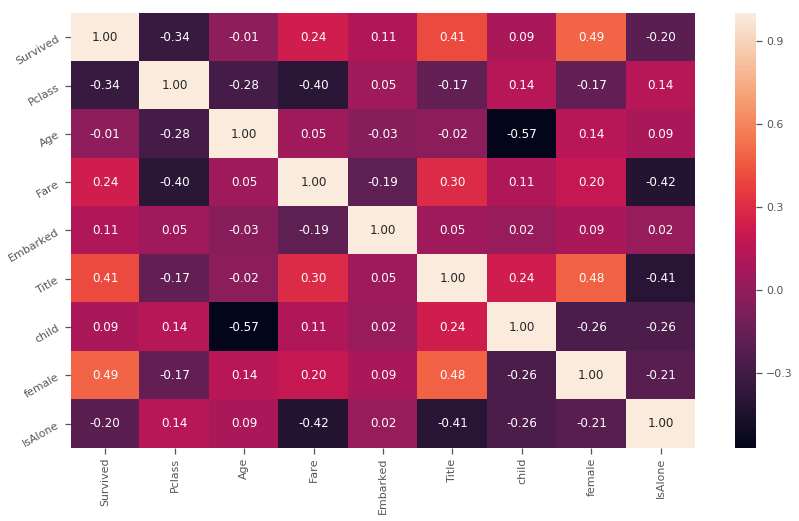

In [30]:
corr = df[0].corr()
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 3})
plt.figure(figsize=(14,8))
a = sns.heatmap(corr, annot=True, fmt='.2f')
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=30)

In [32]:
# define training and testing sets
X_train = df[0].copy().drop("Survived",axis=1)
Y_train = df[0].copy()["Survived"]

for col in X_train.columns:
    data = X_train.copy().drop([col], axis=1)
    data_test = df[1].copy().drop([col], axis=1)
    logreg = LogisticRegression()

    logreg.fit(data, Y_train)

    Y_pred = logreg.predict(data_test)

    print("Removing column", col,"gives score:",logreg.score(data, Y_train))

Removing column Pclass gives score: 0.7800224466891134
Removing column Age gives score: 0.792368125701459
Removing column Fare gives score: 0.7991021324354658
Removing column Embarked gives score: 0.7957351290684624
Removing column Title gives score: 0.7867564534231201
Removing column child gives score: 0.7833894500561167
Removing column female gives score: 0.7598204264870931
Removing column IsAlone gives score: 0.792368125701459


In [44]:
# Random Forests

random_forest = RandomForestClassifier(n_estimators=100)

random_forest.fit(X_train, Y_train)

Y_pred = random_forest.predict(df[1])

random_forest.score(X_train, Y_train)

0.8731762065095399

In [39]:
PassengersID = pd.read_csv(r'C:\Users\Marcello\Desktop\Projects\20190618_Titanic_ML\Dataset\test.csv')
submission = pd.DataFrame({"PassengerId": PassengersID["PassengerId"],"Survived": Y_pred})
submission.to_csv(r'C:\Users\Marcello\Desktop\Projects\20190618_Titanic_ML\Output\submission.csv', index=False)